In [1]:
import platform
import warnings
warnings.filterwarnings('ignore')

from os import listdir
from os.path import isfile, join
import math
import itertools
import random
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

random.seed(200)
print('Python version: {}'.format(platform.python_version()))
print('NetworkX version: {}'.format(nx.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))
print('Numpy version: {}'.format(np.__version__))

Python version: 3.7.4
NetworkX version: 2.4
Matplotlib version: 3.1.1
Numpy version: 1.18.1


In [2]:
mypath = 'raccoon_proximity_weighted'
files = [mypath + '/' + f for f in listdir(mypath) if isfile(join(mypath, f))]
files = [(int(f.split('_')[5].split('.')[0]), f) for f in files]
files.sort()
#files = [f[1] for f in files]

In [3]:
G = nx.read_graphml(files[0][1])
DC = nx.degree_centrality(G)
DC = pd.DataFrame({'week':str(files[0][0]), 'raccoon_ID':list(DC.keys()),
                       'deg_cent':list(DC.values())})
BC = nx.betweenness_centrality(G)
BC = pd.DataFrame({'week':str(files[0][0]), 'raccoon_ID':list(BC.keys()),
                       'deg_cent':list(BC.values())})
DC.merge(BC, how='outer', on=['week', 'raccoon_ID']) 

,week,raccoon_ID,deg_cent_x,deg_cent_y
0,1,1,0.136364,0.000000
1,1,2,0.318182,0.051146
2,1,3,0.409091,0.105904
3,1,4,0.090909,0.012446
4,1,5,0.181818,0.063628
5,1,6,0.181818,0.000000
6,1,7,0.136364,0.002646
7,1,8,0.363636,0.094659
8,1,9,0.590909,0.302010
9,1,10,0.409091,0.163463


In [53]:
random.seed(200)
df = pd.DataFrame()
for f in files:
    G = nx.read_graphml(f[1]).subgraph(filt)
    deg = pd.DataFrame({'week':str(f[0]), 'raccoon_ID':list(G), 'degree':list(G.degree)})
    DC = nx.degree_centrality(G)
    DC = pd.DataFrame({'week':str(f[0]), 'raccoon_ID':list(DC.keys()),
                           'deg_cent':list(DC.values())})
    BC = nx.betweenness_centrality(G)
    BC = pd.DataFrame({'week':str(f[0]), 'raccoon_ID':list(BC.keys()),
                           'bet_cent':list(BC.values())})
    CC = nx.closeness_centrality(G)
    CC = pd.DataFrame({'week':str(f[0]), 'raccoon_ID':list(CC.keys()),
                           'clos_cent':list(CC.values())})
    EC = nx.eigenvector_centrality(G)
    EC = pd.DataFrame({'week':str(f[0]), 'raccoon_ID':list(EC.keys()),
                           'eig_cent':list(EC.values())})
    
    df_aux = DC.merge(BC, how='outer', on=['week', 'raccoon_ID'])
    df_aux = df_aux.merge(CC, how='outer', on=['week', 'raccoon_ID'])
    df_aux = df_aux.merge(EC, how='outer', on=['week', 'raccoon_ID'])
    df_aux = df_aux.merge(deg, how='outer', on=['week', 'raccoon_ID'])
    df = pd.concat([df,df_aux])
df['degree'] = [d[1] for d in df['degree']]
df.groupby('raccoon_ID').mean()

,deg_cent,bet_cent,clos_cent,eig_cent,degree
raccoon_ID,,,,,
0,0.378947,0.123345,0.527120,0.274684,4.895833
1,0.215017,0.046656,0.393910,0.139886,2.755102
10,0.385199,0.089844,0.513893,0.270827,4.833333
11,0.338401,0.070480,0.489747,0.255508,4.326923
12,0.333309,0.077540,0.480886,0.243895,4.279070
13,0.294343,0.048745,0.441844,0.237421,4.022727
14,0.265461,0.069086,0.437055,0.197578,3.444444
15,0.293223,0.051384,0.450683,0.207057,3.925000
2,0.255657,0.058007,0.423411,0.187388,3.346939


In [54]:
fig = px.bar(df, x="raccoon_ID", y="degree", color="raccoon_ID")
fig.show()

DegreeView({'0': 8, '1': 3, '2': 2, '3': 2, '4': 2, '5': 4, '6': 4, '7': 5, '8': 3, '9': 2, '10': 2, '11': 3, '12': 5, '13': 2, '14': 2, '15': 3})

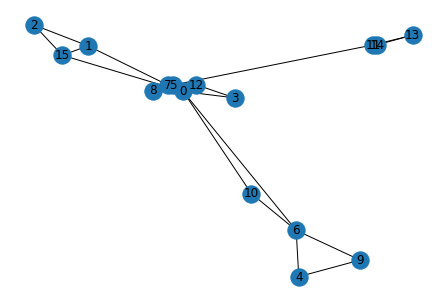

In [42]:
G = nx.read_graphml(files[7][1])
filt = df.groupby('raccoon_ID').count()['week']
filt = filt[filt>36].index
nx.draw(G.subgraph(filt), with_labels=True)
G.subgraph(filt).degree

In [30]:
nx.adjacency_matrix(G)

<22x22 sparse matrix of type '<class 'numpy.longlong'>'
	with 100 stored elements in Compressed Sparse Row format>

In [ ]:
random.seed(200)
final_pos = []
for f in files:
    final_pos.append(nx.spring_layout(nx.read_graphml(f)))
final_pos

In [51]:
DC[DC["week"]==30]

,week,raccoon_ID,deg_cent
0,30,0,0.285714
1,30,3,0.571429
2,30,5,0.714286
3,30,8,0.571429
4,30,10,1.000000
5,30,11,0.714286
6,30,12,0.714286
7,30,14,0.857143
